In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [2]:
dt = pd.read_csv('/kaggle/input/sachin/customer_churn_dataset.csv')

In [3]:
print(dt.head())
print(dt.info())

   customer_id  gender  age marital_status  dependents contract_type  \
0         3850    Male   42        Married           3       Monthly   
1         4696  Female   76         Single           1        Yearly   
2         5695  Female   39        Married           2       Monthly   
3         8712  Female   74         Single           3       Monthly   
4        10506    Male   30        Married           3        Yearly   

  internet_service phone_service multiple_lines online_security  ...  \
0      Fiber Optic            No             No             Yes  ...   
1              DSL            No            Yes             Yes  ...   
2      Fiber Optic           Yes             No             Yes  ...   
3              DSL            No             No              No  ...   
4              DSL            No            Yes              No  ...   

  device_protection tech_support streaming_tv streaming_movies  \
0                No          Yes          Yes              Yes   
1 

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [5]:
le = LabelEncoder()
for column in dt.columns:
    if dt[column].dtype == 'object':
        dt[column] = le.fit_transform(dt[column])

In [6]:
dt = dt.drop(['customer_id','gender','marital_status','contract_type'],axis=1)

In [7]:
dt = dt.dropna()

In [8]:
X = dt.drop('churn_status', axis=1)  
y = dt['churn_status'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf = clf.fit(X_train, y_train)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.68
Confusion Matrix:
[[96 28]
 [20  6]]


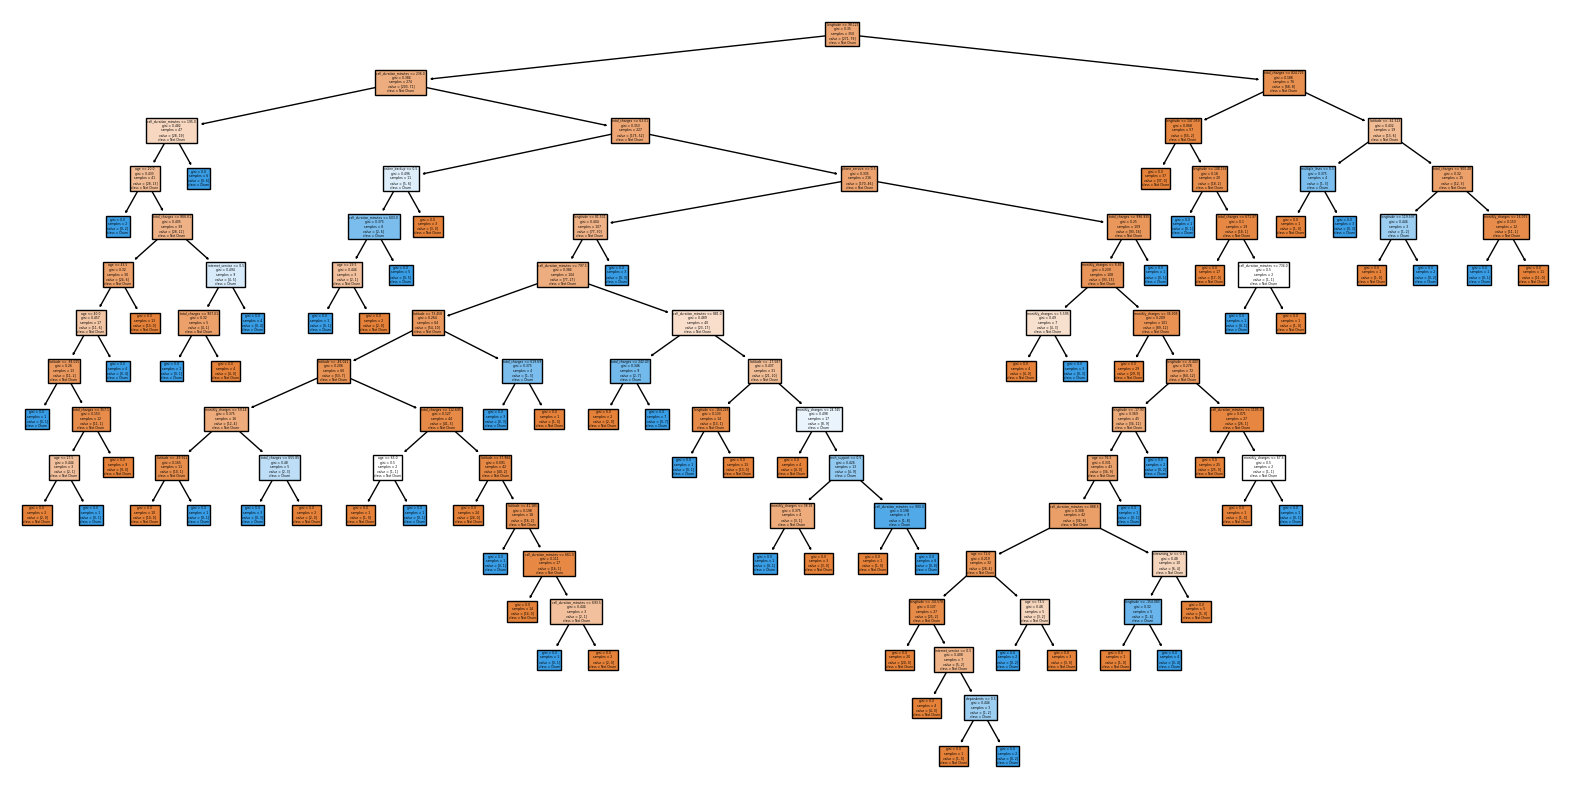

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'])
plt.show()